In [11]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt

pickle_file = 'results_and_resampled_data.pickle'

if not os.path.exists('plots'):
    os.makedirs('plots')

with open(pickle_file, 'rb') as f:
    data = pickle.load(f)

# Open data/participants.csv
participant_start = {}
with open('data/participants.csv', 'r') as f:
    plines = f.readlines()
assert plines[0].strip().replace(' ','') == 'Participant,Startedwith', 'First line of participants.csv must be "Participant,Start"'

for line in plines[1:]:
    participant, startedwith = line.strip().split(',')
    participant = participant.strip()
    assert participant in data.keys(), 'Participant {} not found in data'.format(participant)

    startedwith = startedwith.strip()
    assert startedwith in ['2D', '3D'], 'Startedwith must be either 2D or 3D'
    participant_start[participant] = startedwith


In [12]:
if not os.path.exists('plots'):
    os.makedirs('plots')

if not os.path.exists('plots/qom'):
    os.makedirs('plots/qom')

In [13]:
DEFAULT_MATPLOTLIB_COLORS = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [14]:
ALLTRACKS = ['Percussions (ID1)','Xylophone (ID3)', 'Texture (ID5)', 'Brass (ID7)', 'Voice (ID9)']
all_2D_QoMs_pertrack = {track:[] for track in ALLTRACKS}
all_3D_QoMs_pertrack = {track:[] for track in ALLTRACKS}


all_2D_QoMs_pertrack_startedwith2D = {track:[] for track in ALLTRACKS}
all_3D_QoMs_pertrack_startedwith2D = {track:[] for track in ALLTRACKS}

all_2D_QoMs_pertrack_startedwith3D = {track:[] for track in ALLTRACKS}
all_3D_QoMs_pertrack_startedwith3D = {track:[] for track in ALLTRACKS}

assert len(data.keys()) == 12, 'There should be 12 participants'

for participant in data.keys():
    assert all([track in data[participant].keys() for track in ALLTRACKS]), 'Participant {} is missing some tracks'.format(participant)
    assert len (data[participant].keys()) == 5+1, 'Participant {} has more than 5 tracks and 1 averages'.format(participant)

    fig, ax = plt.subplots(1, 1)
    ax.set_title('Participant {}'.format(participant))
    ax.set_xlabel('Tracks')
    ax.set_ylabel('Quantity of Motion')

    bar_width = 0.35



    for tidx,track in enumerate(ALLTRACKS):
        # print('track', track)
        xpos2D = tidx - bar_width/2
        xpos3D = tidx + bar_width/2

        # print('data[participant][track][2D].keys()', data[participant][track]['2D'].keys())
        _2dQoM = data[participant][track]['2D']['QoM']
        _3dQoM = data[participant][track]['3D_DTW']['QoM']

        all_2D_QoMs_pertrack[track].append(_2dQoM)
        all_3D_QoMs_pertrack[track].append(_3dQoM)

        if participant_start[participant] == '2D':
            all_2D_QoMs_pertrack_startedwith2D[track].append(_2dQoM)
            all_3D_QoMs_pertrack_startedwith2D[track].append(_3dQoM)
        elif participant_start[participant] == '3D':
            all_2D_QoMs_pertrack_startedwith3D[track].append(_2dQoM)
            all_3D_QoMs_pertrack_startedwith3D[track].append(_3dQoM)
        else:
            raise ValueError('Participant {} has invalid startedwith {}'.format(participant, participant_start[participant]))

        # print('2D Quantity of Motion', _2dQoM)
        # print('3D Quantity of Motion', _3dQoM)

        ax.bar(xpos2D, _2dQoM, bar_width, label='DAW (2D)', color=DEFAULT_MATPLOTLIB_COLORS[2], edgecolor='k')
        ax.bar(xpos3D, _3dQoM, bar_width, label='VR (3D)', color=DEFAULT_MATPLOTLIB_COLORS[4], edgecolor='k')

        ax.set_ylim(0, 45)


    # Collapse legend not to include all repeated labels
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys())

    
    # Remove IDX from track names
    tracknames = [track[:-6] for track in ALLTRACKS]
    plt.xticks(range(len(tracknames)), tracknames)




    # plt.savefig('plots/qom/quom{}.pdf'.format(participant), bbox_inches='tight')
    plt.savefig('plots/qom/quom{}.png'.format(participant), bbox_inches='tight')
    plt.close()

assert len(all_2D_QoMs_pertrack.keys()) == len(all_3D_QoMs_pertrack.keys()) == 5, 'There should be 5 tracks, found {} & {}'.format(len(all_2D_QoMs_pertrack.keys()),len(all_3D_QoMs_pertrack.keys()))
for track in all_2D_QoMs_pertrack.keys():
    assert len(all_2D_QoMs_pertrack[track]) == len(all_3D_QoMs_pertrack[track]) == 12, 'There should be 12 participants, found {} & {}'.format(len(all_2D_QoMs_pertrack[track]),len(all_3D_QoMs_pertrack[track]))

for track in all_2D_QoMs_pertrack_startedwith2D.keys():
    assert len(all_2D_QoMs_pertrack_startedwith2D[track]) == len(all_3D_QoMs_pertrack_startedwith2D[track]) == 6, 'There should be 6 participants, found {} & {}'.format(len(all_2D_QoMs_pertrack_startedwith2D[track]),len(all_3D_QoMs_pertrack_startedwith2D[track]))
    assert len(all_2D_QoMs_pertrack_startedwith3D[track]) == len(all_3D_QoMs_pertrack_startedwith3D[track]) == 6, 'There should be 6 participants, found {} & {}'.format(len(all_2D_QoMs_pertrack_startedwith3D[track]),len(all_3D_QoMs_pertrack_startedwith3D[track]))

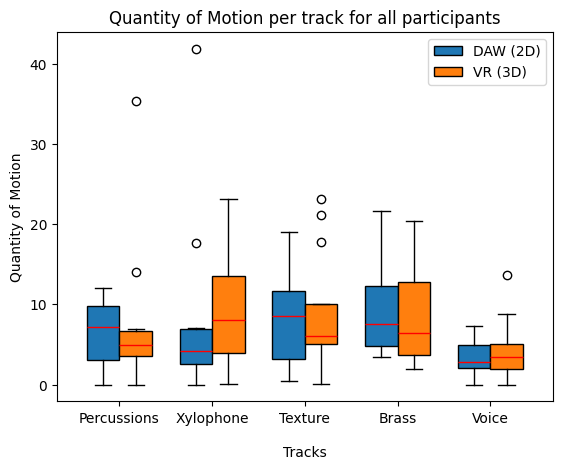

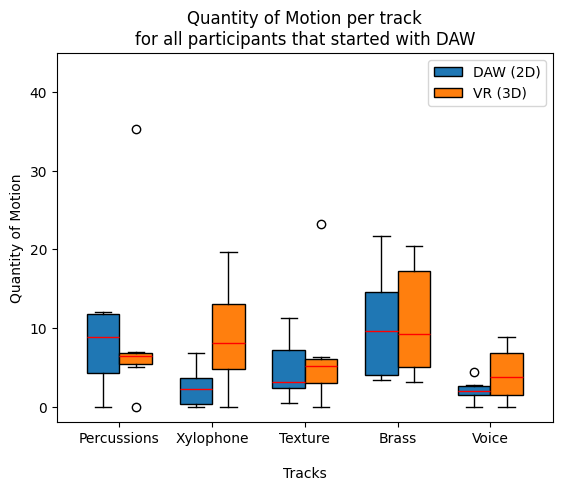

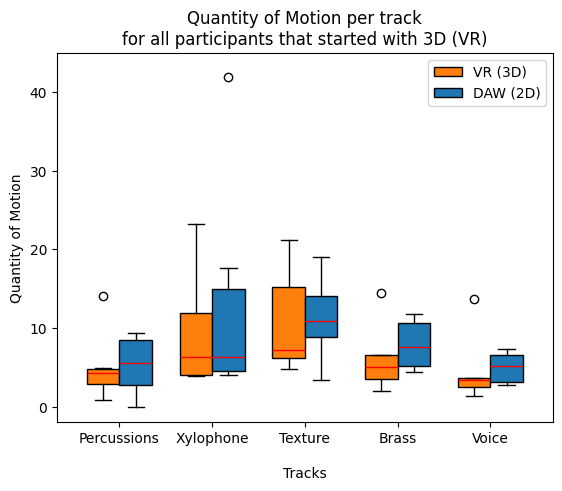

In [15]:
# now plot maxQoM for 2D and 3D as boxplots

# def setboxcolor(bp, color):
#     color = DEFAULT_MATPLOTLIB_COLORS[1]
#     for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
#             plt.setp(bp[item], color=color)
#     # plt.setp(bp["boxes"], facecolor=color)
#     plt.setp(bp["fliers"], markeredgecolor=color)


def boxplot_QoM(data1, data2, label1, label2, reverse = False, color1=DEFAULT_MATPLOTLIB_COLORS[0], color2=DEFAULT_MATPLOTLIB_COLORS[1]):
    # color1 = DEFAULT_MATPLOTLIB_COLORS[0]
    # color2 = DEFAULT_MATPLOTLIB_COLORS[1]

    fig, ax = plt.subplots(1, 1)
    ax.set_xlabel('Tracks',labelpad=15)
    ax.set_ylabel('Quantity of Motion')

    def plot1():
        if reverse:
            poss = np.arange(len(ALLTRACKS))+bar_width/2
        else:
            poss = np.arange(len(ALLTRACKS))-bar_width/2
        box1 = ax.boxplot([data1[track] for track in ALLTRACKS], positions=poss, widths=bar_width, label=label1, patch_artist=True)
        # for element in ['boxes', 'whiskers', 'caps', 'medians']:
        #     plt.setp(box1[element], color=color1)  # Set all elements to red
        for patch in box1['boxes']:
            patch.set(facecolor=color1)  # Fill the boxes with red
        return box1

    def plot2():
        if reverse:
            poss = np.arange(len(ALLTRACKS))-bar_width/2
        else:
            poss = np.arange(len(ALLTRACKS))+bar_width/2
        box2 = ax.boxplot([data2[track] for track in ALLTRACKS], positions=poss, widths=bar_width, label=label2, patch_artist=True)
        # for element in ['boxes', 'whiskers', 'caps', 'medians']:
        #     plt.setp(box2[element], color=color2)  # Set all elements to purple
        for patch in box2['boxes']:
            patch.set(facecolor=color2)  # Fill the boxes with purple
        return box2
    
    if not reverse:
        box1 = plot1()
        box2 = plot2()
    else:
        box2 = plot2()
        box1 = plot1()


    for element in ['medians']:
        plt.setp(box1[element], color='red')  # Set all elements to red
        plt.setp(box2[element], color='red')  # Set all elements to red

    plt.xticks(range(len(ALLTRACKS)), [track[:-6] for track in ALLTRACKS])

    ax.legend()

    return fig, ax

fig, ax = boxplot_QoM(all_2D_QoMs_pertrack, all_3D_QoMs_pertrack, label1='DAW (2D)', label2='VR (3D)')
ax.set_title('Quantity of Motion per track for all participants')
plt.savefig('plots/qom/qom_allparticipants.pdf', bbox_inches='tight')
plt.show()


fig, ax = boxplot_QoM(all_2D_QoMs_pertrack_startedwith2D, all_3D_QoMs_pertrack_startedwith2D, label1='DAW (2D)', label2='VR (3D)')
ax.set_title('Quantity of Motion per track\nfor all participants that started with DAW')
plt.savefig('plots/qom/qom_startedwith2D.pdf', bbox_inches='tight')
ax.set_ylim(-2, 45)
plt.show()

fig, ax = boxplot_QoM(all_2D_QoMs_pertrack_startedwith3D, all_3D_QoMs_pertrack_startedwith3D, label1='DAW (2D)', label2='VR (3D)', reverse=True)
ax.set_title('Quantity of Motion per track\nfor all participants that started with 3D (VR)')
plt.savefig('plots/qom/qom_startedwith3D.pdf', bbox_inches='tight')
ax.set_ylim(-2, 45)
plt.show()


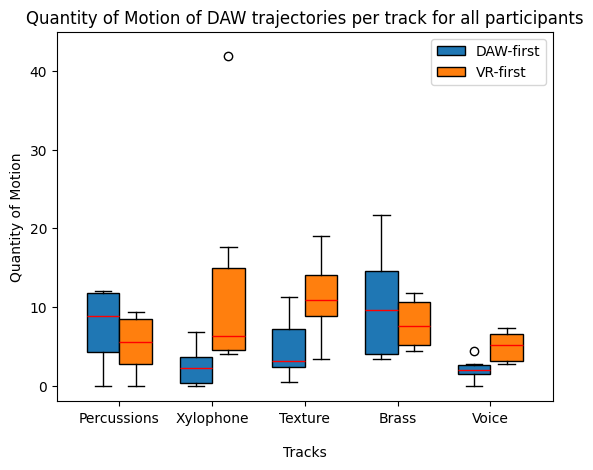

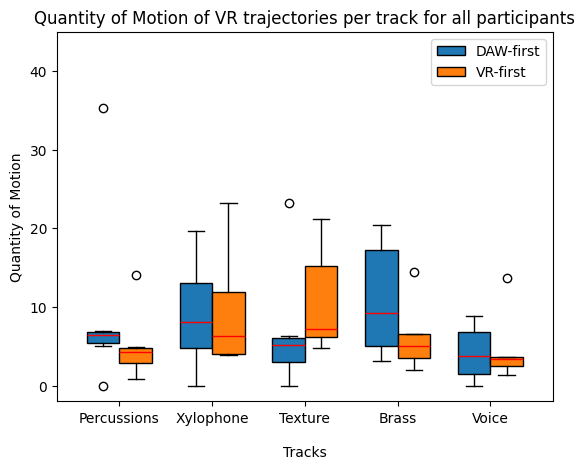

In [16]:
fig, ax = boxplot_QoM(all_2D_QoMs_pertrack_startedwith2D, all_2D_QoMs_pertrack_startedwith3D, label1='DAW-first', label2='VR-first', color1=DEFAULT_MATPLOTLIB_COLORS[0], color2=DEFAULT_MATPLOTLIB_COLORS[1])
ax.set_title(r'Quantity of Motion of DAW trajectories per track for all participants')
plt.savefig('plots/qom/qom_2D_bystarted.pdf', bbox_inches='tight')
plt.savefig('plots/qom/qom_2D_bystarted.png', bbox_inches='tight')

ax.set_ylim(-2, 45)
plt.show()

fig, ax = boxplot_QoM(all_3D_QoMs_pertrack_startedwith2D, all_3D_QoMs_pertrack_startedwith3D, label1='DAW-first', label2='VR-first', color1=DEFAULT_MATPLOTLIB_COLORS[0], color2=DEFAULT_MATPLOTLIB_COLORS[1])
ax.set_title(r'Quantity of Motion of VR trajectories per track for all participants')
plt.savefig('plots/qom/qom_3D_bystarted.pdf', bbox_inches='tight')
plt.savefig('plots/qom/qom_3D_bystarted.png', bbox_inches='tight')
ax.set_ylim(-2, 45)
plt.show()

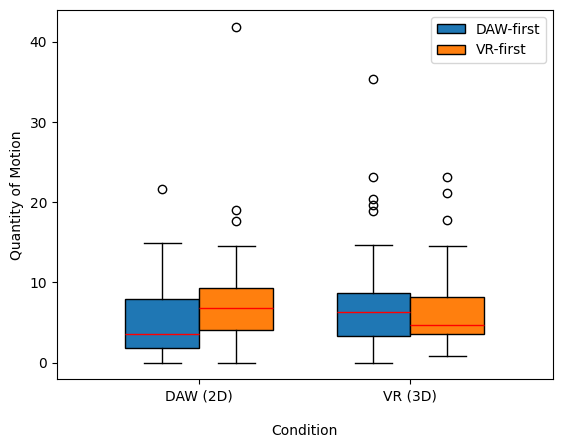

In [17]:

color1 = DEFAULT_MATPLOTLIB_COLORS[0]
color2 = DEFAULT_MATPLOTLIB_COLORS[1]

put_all_tracks_togethter = lambda data: np.array([data[track] for track in data.keys()]).flatten()
all2d_2dfirst = put_all_tracks_togethter(all_2D_QoMs_pertrack_startedwith2D)
assert len(all2d_2dfirst) == 5*6, 'Expected 5*6=30, got {}'.format(len(all2d_2dfirst))
all3d_2dfirst = put_all_tracks_togethter(all_3D_QoMs_pertrack_startedwith2D)
assert len(all3d_2dfirst) == 5*6, 'Expected 5*6=30, got {}'.format(len(all3d_2dfirst))

all2d_3dfirst = put_all_tracks_togethter(all_2D_QoMs_pertrack_startedwith3D)
assert len(all2d_3dfirst) == 5*6, 'Expected 5*6=30, got {}'.format(len(all2d_3dfirst))
all3d_3dfirst = put_all_tracks_togethter(all_3D_QoMs_pertrack_startedwith3D)
assert len(all3d_3dfirst) == 5*6, 'Expected 5*6=30, got {}'.format(len(all3d_3dfirst))

processed_2Dfirst_bytype = [all2d_2dfirst, all3d_2dfirst]
label1 = 'DAW-first'

processed_3Dfirst_bytype = [all2d_3dfirst, all3d_3dfirst]
label2 = 'VR-first'


fig, ax = plt.subplots(1, 1)
ax.set_xlabel('Condition',labelpad=15)
ax.set_ylabel('Quantity of Motion')

poss = np.arange(len(processed_2Dfirst_bytype))-bar_width/2
box1 = ax.boxplot(processed_2Dfirst_bytype, positions=poss, widths=bar_width, label=label1, patch_artist=True)
# for element in ['boxes', 'whiskers', 'caps', 'medians']:
#     plt.setp(box1[element], color=color1)  # Set all elements to red
for patch in box1['boxes']:
    patch.set(facecolor=color1)  # Fill the boxes with red

poss = np.arange(len(processed_3Dfirst_bytype))+bar_width/2
box2 = ax.boxplot(processed_3Dfirst_bytype, positions=poss, widths=bar_width, label=label2, patch_artist=True)
# for element in ['boxes', 'whiskers', 'caps', 'medians']:
#     plt.setp(box2[element], color=color2)  # Set all elements to purple
for patch in box2['boxes']:
    patch.set(facecolor=color2)  # Fill the boxes with purple



for element in ['medians']:
    plt.setp(box1[element], color='red')  # Set all elements to red
    plt.setp(box2[element], color='red')  # Set all elements to red

plt.xticks(range(2), ['DAW (2D)', 'VR (3D)'])

ax.legend()

plt.savefig('plots/qom/qom_bytype.pdf', bbox_inches='tight')
plt.savefig('plots/qom/qom_bytype.png', bbox_inches='tight')
plt.show()


In [18]:
# processed_2Dfirst_bytype
# The column labels for this are: DAW(2D)-DAWfirst, VR(3D)_DAWfirst
# 
# processed_3Dfirst_bytype
# The column labels for this are: DAW(2D)-VRfirst, VR(3D)-VRfirst

import pandas as pd
df = pd.DataFrame({'Condition_2D-Started_2D':processed_2Dfirst_bytype[0], 
                   'Condition_3D-Started_2D':processed_2Dfirst_bytype[1], 
                   'Condition_2D-Started_3D':processed_3Dfirst_bytype[0], 
                   'Condition_3D-Started_3D':processed_3Dfirst_bytype[1]})

if not os.path.exists('res'):
    os.makedirs('res')
df.to_csv('res/qom_bytype.csv', index=False)
